# Diagnostic
Diagnostic analytics unlocks the **WHY** behind data by examining data to understand the root causes of events, behaviors, and outcomes. Its main goal is to offer insights into the factors contributing to a particular outcome or problem and fills the space between `descriptive analytics and predictive analytics`. These insights add context and detail to the data, helping to make more precise choices by fully understanding influencing factors.


## Diagnostic analytics aims to answer questions like:

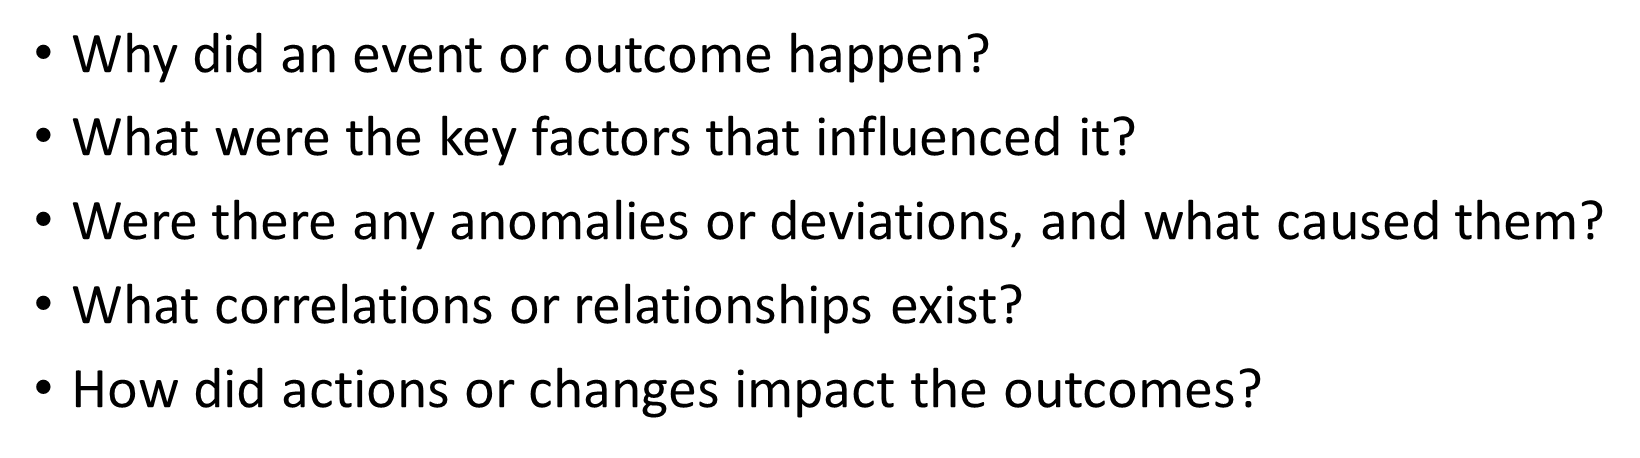


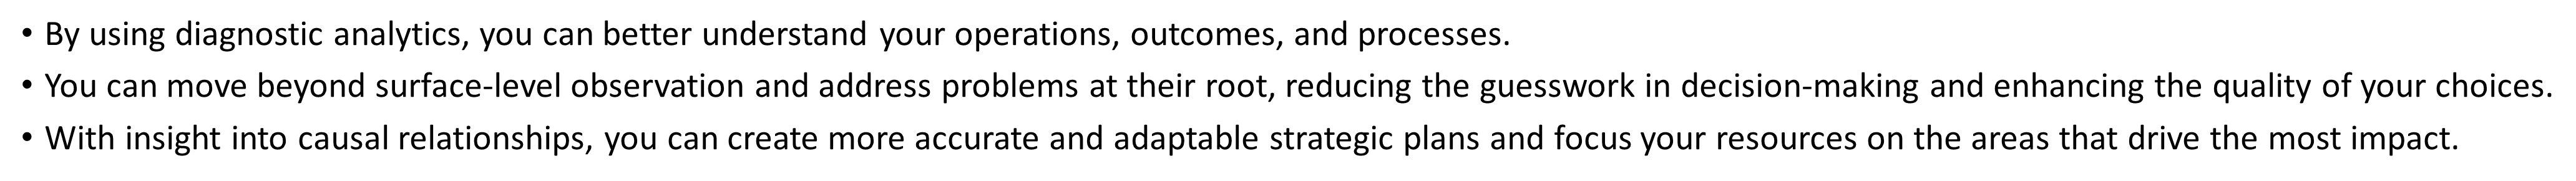

### Problem Statement

A retail company, "ShopSmart," wants to understand the factors affecting their sales. They have collected data from their online and physical stores over the last year. The management suspects that various factors like advertising spend, product pricing, customer demographics, and seasonal trends may influence sales. They want to use this data to perform diagnostic analysis and identify the key drivers behind their sales performance. **The ultimate goal is to optimize these factors to boost sales.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train2.csv")
df.head()

,Ad_Spend,Product_Price,Discount,Location,Season,Sales
0,4370.861070,26.661964,7.851171,East,Winter,40.043554
1,9556.428758,58.771085,7.409364,North,Winter,15.109595
2,7587.945476,88.565125,27.187637,North,Autumn,20.161922
3,6387.926358,75.900240,7.486386,West,Spring,-2.712025
4,2404.167764,82.590503,8.158492,East,Autumn,-14.548323


<AxesSubplot:xlabel='Sales', ylabel='Ad_Spend'>

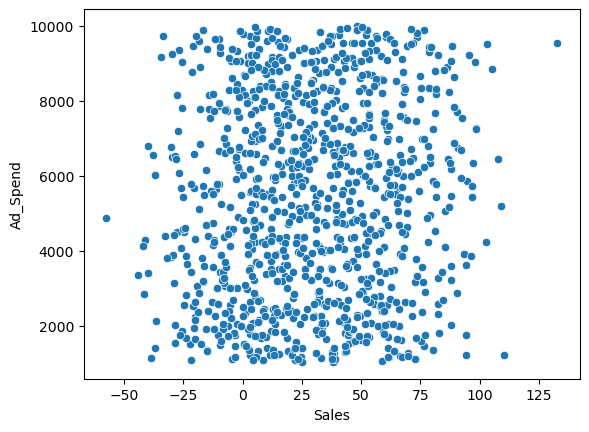

In [3]:
sns.scatterplot(x=df["Sales"], y=df["Ad_Spend"])

<AxesSubplot:xlabel='Sales', ylabel='Product_Price'>

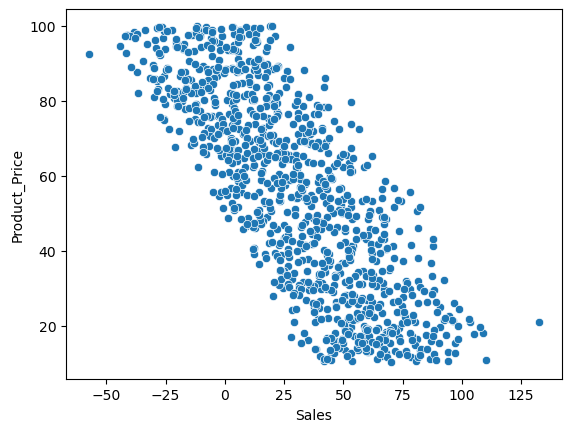

In [4]:
sns.scatterplot(x=df["Sales"], y=df["Product_Price"])

<AxesSubplot:xlabel='Sales', ylabel='Discount'>

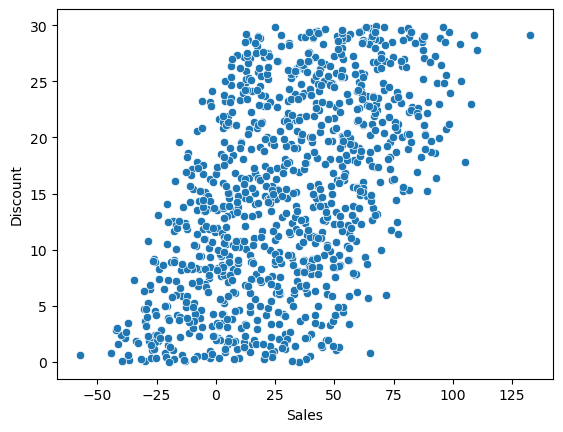

In [5]:
sns.scatterplot(x=df["Sales"], y=df["Discount"])

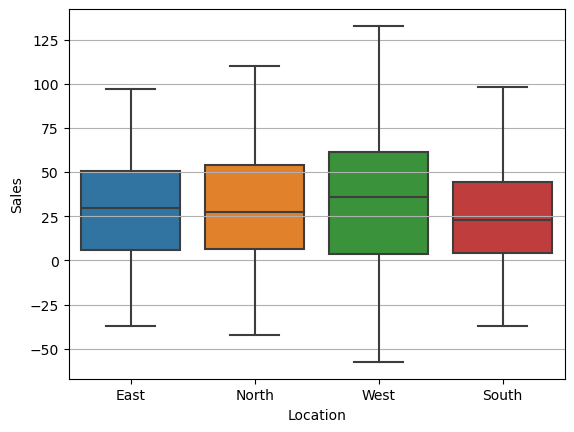

In [9]:
sns.boxplot(x=df["Location"], y=df["Sales"])
plt.grid(axis="y")

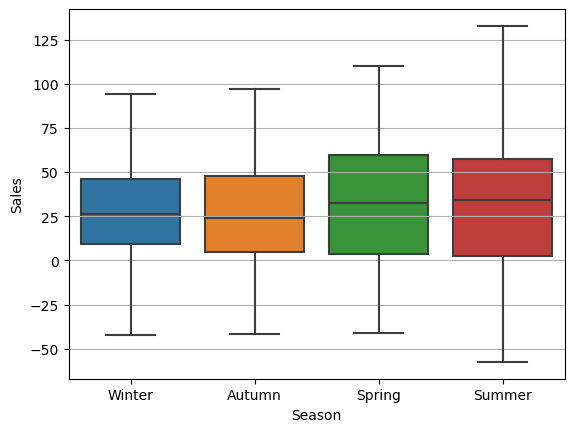

In [10]:
sns.boxplot(x=df["Season"], y=df["Sales"])
plt.grid(axis="y")

### 1. **Statistical Testing: Pearson Correlation**
   - **Objective**: To measure the linear relationship between two continues variable.
   

   - Pearson correlation will give a value between -1 and 1.
   
     - \( r = 1 \): Perfect positive linear relationship.
     - \( r = -1 \): Perfect negative linear relationship.
     - \( r = 0 \): No linear relationship.


In [11]:
import pandas as pd
from scipy.stats import pearsonr


In [12]:
cor, pvalue= pearsonr(x=df["Ad_Spend"], y=df["Sales"])
cor

0.0737275486818058

Based on the result, we can conclude that ad_spend is not an influencing factor od Sales

In [14]:
cor, pvalue= pearsonr(x=df["Product_Price"], y=df["Sales"])
cor

-0.7881040580237575

### 3. **Variance Analysis (ANOVA)**
   - **Objective**: To test if there are statistically significant differences in continues variable at different levels of categories variable.
   


In [17]:
import scipy.stats as stats

In [18]:
df["Location"].value_counts()

East     259
South    256
North    250
West     235
Name: Location, dtype: int64

In [22]:
east_sales=df[df["Location"]=="East"]["Sales"]
east_sales

0      40.043554
4     -14.548323
7      10.211466
8      28.503492
11    -33.733417
         ...    
990   -12.519995
993    57.206098
994   -12.033229
997    42.821410
999    69.515004
Name: Sales, Length: 259, dtype: float64

In [23]:
west_sales=df[df["Location"]=="West"]["Sales"]
west_sales

3      -2.712025
6       0.413221
10     24.634917
15    -13.041899
16     46.781187
         ...    
984    92.707386
986   -27.376016
991    98.602072
995    33.351916
996   -29.636996
Name: Sales, Length: 235, dtype: float64

In [24]:
north_sales=df[df["Location"]=="North"]["Sales"]
north_sales

1      15.109595
2      20.161922
19     94.242416
20     40.848791
23    -41.086980
         ...    
963    67.303831
977     1.522207
981   -10.078333
992    21.175554
998    63.808100
Name: Sales, Length: 250, dtype: float64

In [25]:
south_sales=df[df["Location"]=="South"]["Sales"]
south_sales

5      20.415517
9      30.032051
14      3.235853
22     17.443433
29     10.429279
         ...    
974    30.822102
979    27.452501
980    57.395513
987    12.503540
988    35.244123
Name: Sales, Length: 256, dtype: float64

In [26]:
df.query("Location=='East'") #for text use single quote

,Ad_Spend,Product_Price,Discount,Location,Season,Sales
0,4370.861070,26.661964,7.851171,East,Winter,40.043554
4,2404.167764,82.590503,8.158492,East,Autumn,-14.548323
7,8795.585312,86.427609,23.301317,East,Spring,10.211466
8,6410.035106,32.470121,1.960985,East,Summer,28.503492
11,9729.188669,98.890121,1.879596,East,Autumn,-33.733417
...,...,...,...,...,...,...
990,8194.742911,78.896161,5.377668,East,Spring,-12.519995
993,6312.076002,22.181867,11.896610,East,Autumn,57.206098
994,4248.765072,77.623758,3.951451,East,Winter,-12.033229
997,2231.367678,16.206221,9.293636,East,Winter,42.821410


In [27]:
df.query("Product_Price>26.661964") #for text do not use single quote

,Ad_Spend,Product_Price,Discount,Location,Season,Sales
1,9556.428758,58.771085,7.409364,North,Winter,15.109595
2,7587.945476,88.565125,27.187637,North,Autumn,20.161922
3,6387.926358,75.900240,7.486386,West,Spring,-2.712025
4,2404.167764,82.590503,8.158492,East,Autumn,-14.548323
5,2403.950683,69.290503,22.781948,South,Autumn,20.415517
...,...,...,...,...,...,...
992,3449.306235,64.920263,16.581212,North,Autumn,21.175554
994,4248.765072,77.623758,3.951451,East,Winter,-12.033229
995,1824.238660,69.125964,25.958873,West,Autumn,33.351916
996,9255.822179,96.095316,4.718196,West,Summer,-29.636996


In [28]:
df.query("Location=='East'")["Sales"] #for text use single quote for specific column

0      40.043554
4     -14.548323
7      10.211466
8      28.503492
11    -33.733417
         ...    
990   -12.519995
993    57.206098
994   -12.033229
997    42.821410
999    69.515004
Name: Sales, Length: 259, dtype: float64

null hypothesis: the variability in sales mean across the location is the same(no difference is sales mean across locations)
alternative hypothesis: is the opposite of null(is not the same)(at least there will be one location with different mean)
p(probability) value: to reject the null hypothesis or fail to reject the null hypothesis by comparing it with significant figure or no of alpha
significant value: same this as alpha, is used to check the variability in our statistical test it is set to 95%
        

alpha=5% is always )0.05 or 1 meaning ( im 95% sure im not making an error  and 5% sure im making type 1 error)

Type I error(False positive) when the actual value is negative but the result says it is positive(doctor telling a man he is pregnant)
Type II error(False negative) is the negative of type 1 (doctor telling a pregnant woman she is not pregnant)

pvalue <= alpha (reject the null hypothesis) 
pvalue > alpha (accept the null hypothesis)

In [29]:
east_sales=df[df["Location"]=="East"]["Sales"]
west_sales=df[df["Location"]=="West"]["Sales"]
north_sales=df[df["Location"]=="North"]["Sales"]
south_sales=df[df["Location"]=="South"]["Sales"]

import scipy.stats as stats
stat, pval = stats.f_oneway(east_sales, west_sales,north_sales, south_sales )
alpha = 0.05
if pval<=alpha:
    print(f"there is enough evidence to reject null hypothesis: \n p value:{pval}")
else:
    print(f"there is enough evidence to accept null hypothesis: \n p value:{pval}")

there is enough evidence to reject null hypothesis: 
 p value:0.03950956858295283


### 2. **Regression Analysis**
   - **Objective**: To quantify how much of the variability in sales is explained by other variables
   


In [30]:
import statsmodels.api as sm


In [32]:
rel = {"Winter":4, "Autumn":3, "Summer":2, "Spring":1}
df["Season"]=df["Season"].map(rel)

In [36]:
df_dummies=pd.get_dummies(df, columns=["Location"], drop_first=True)

In [38]:
# split the data into features and target
X=df_dummies.copy()
y=X.pop("Sales")

In [41]:
# adding constants i.e starting point
X["constant"]=np.ones(len(X))

In [42]:
model=sm.OLS(endog=y, exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2545.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:46:24   Log-Likelihood:                -3409.4
No. Observations:                1000   AIC:                             6835.
Df Residuals:                     992   BIC:                             6874.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Ad_Spend           0.0010   8.87e-05     11.427      0.000       0.001       0.001
Product_Price     -0.9820      0.009   -110.856      0.000      -0.999      -0.965
Discount           2.0044      0.027     75.059      0.000       1.952       2.057
Season            -2.4533      0.209    -11.765      0.000      -2.863      -2.044
Location_North     1.5322      0.652      2.349      0.019       0.252       2.812
Location_South    -3.5012      0.648     -5.405      0.000      -4.772      -2.230
Location_West      4.2948      0.663      6.482      0.000       2.995       5.595
constant          54.0475      1.064     50.798      0.000      51.960      56.135
==============================================================================
Omnibus:                       15.636   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.317
Skew:                           0.115   Prob(JB):                     5.24e-06
Kurtosis:                       3.728   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""